# 시계열

In [13]:
import pandas as pd

df = pd.read_excel('/content/drive/MyDrive/data/crime.xlsx')
df

,dt,lat,long
0,2016-09-30,40.837376,-73.887761
1,2016-09-30,40.661205,-73.950687
2,2016-09-30,40.816872,-73.850685
3,2016-09-30,40.696177,-73.804492
4,2016-09-30,40.741458,-73.884339
...,...,...,...
353202,2016-11-26,40.853241,-73.853654
353203,2016-11-21,40.832747,-73.940770
353204,2016-09-03,40.651416,-73.840882
353205,2016-07-05,40.698159,-73.795085


In [14]:
df.groupby('dt').size().reset_index()

,dt,0
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030
...,...,...
361,2016-12-27,101
362,2016-12-28,144
363,2016-12-29,128
364,2016-12-30,207


In [15]:
time_df = df.groupby('dt').size().reset_index()
time_df.columns = ['dt', 'crime_cnt']
time_df.head()

,dt,crime_cnt
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030


<Figure size 1080x504 with 0 Axes>

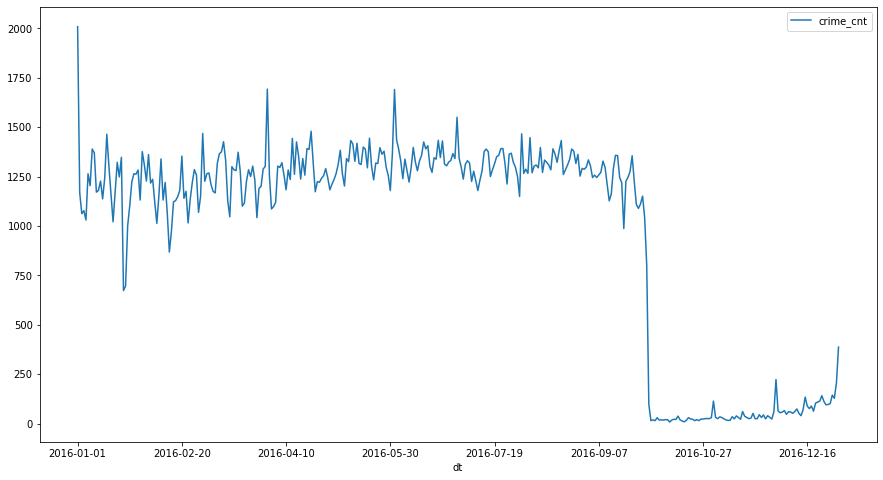

In [16]:
# additive model: trend + cycle + seasonal + irregular

import matplotlib.pyplot as plt

plt.figure(figsize=(15,7))
ax = time_df.plot(x='dt', y='crime_cnt', figsize=(15,8))

In [17]:
time_df.head()

,dt,crime_cnt
0,2016-01-01,2008
1,2016-01-02,1168
2,2016-01-03,1062
3,2016-01-04,1077
4,2016-01-05,1030


In [19]:
time_df['dt'] = pd.to_datetime(time_df['dt'])

In [20]:
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   dt         366 non-null    datetime64[ns]
 1   crime_cnt  366 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.8 KB


In [23]:
time_df.head()

,crime_cnt
dt,
2016-01-01,2008
2016-01-02,1168
2016-01-03,1062
2016-01-04,1077
2016-01-05,1030


In [22]:
time_df = time_df.set_index('dt')

In [ ]:
import statsmodels.api as sm

In [24]:
result = sm.tsa.seasonal_decompose(time_df.crime_cnt)

In [25]:
result

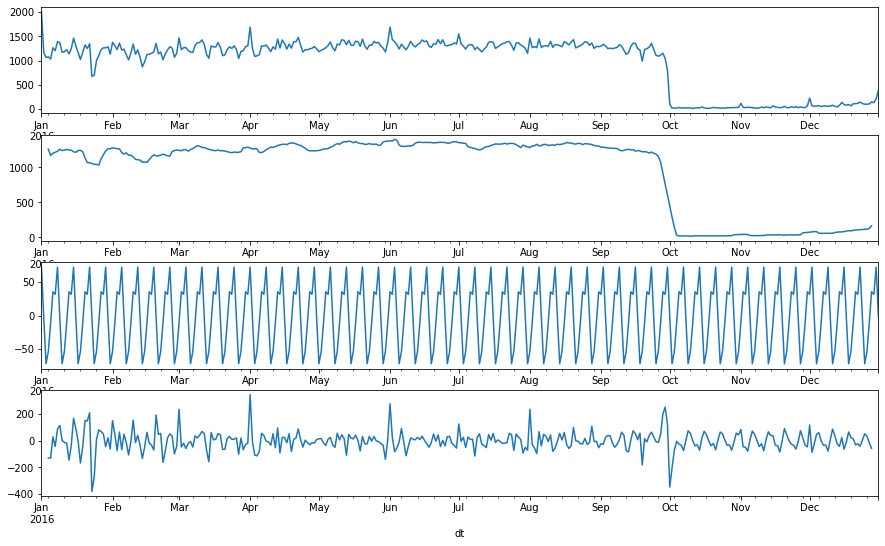

In [26]:
fig,(ax1,ax2,ax3,ax4) = plt.subplots(4,1, figsize=(15,9))
result.observed.plot(ax=ax1)
result.trend.plot(ax=ax2)
result.seasonal.plot(ax=ax3)
result.resid.plot(ax=ax4)

In [32]:
# ascending=False
time_df = time_df.sort_values(by='dt')
time_df.head(10)

,crime_cnt
dt,
2016-01-01,2008
2016-01-02,1168
2016-01-03,1062
2016-01-04,1077
2016-01-05,1030
2016-01-06,1264
2016-01-07,1204
2016-01-08,1389
2016-01-09,1370


In [29]:
time_df['crime_cnt'].rolling(window=2).mean()

dt
2016-01-01       NaN
2016-01-02    1588.0
2016-01-03    1115.0
2016-01-04    1069.5
2016-01-05    1053.5
               ...  
2016-12-27      99.0
2016-12-28     122.5
2016-12-29     136.0
2016-12-30     167.5
2016-12-31     297.0
Name: crime_cnt, Length: 366, dtype: float64

In [31]:
(2008+1168)/2

1588.0

In [33]:
time_df['moving_avg7'] = time_df['crime_cnt'].rolling(window=7).mean()
time_df['moving_avg14'] = time_df['crime_cnt'].rolling(window=14).mean()
time_df['moving_avg21'] = time_df['crime_cnt'].rolling(window=21).mean()

In [34]:
time_df

,crime_cnt,moving_avg7,moving_avg14,moving_avg21
dt,,,,
2016-01-01,2008,NaN,NaN,NaN
2016-01-02,1168,NaN,NaN,NaN
2016-01-03,1062,NaN,NaN,NaN
2016-01-04,1077,NaN,NaN,NaN
2016-01-05,1030,NaN,NaN,NaN
...,...,...,...,...
2016-12-27,101,109.857143,99.571429,85.333333
2016-12-28,144,114.857143,104.857143,89.333333
2016-12-29,128,116.857143,104.428571,92.619048


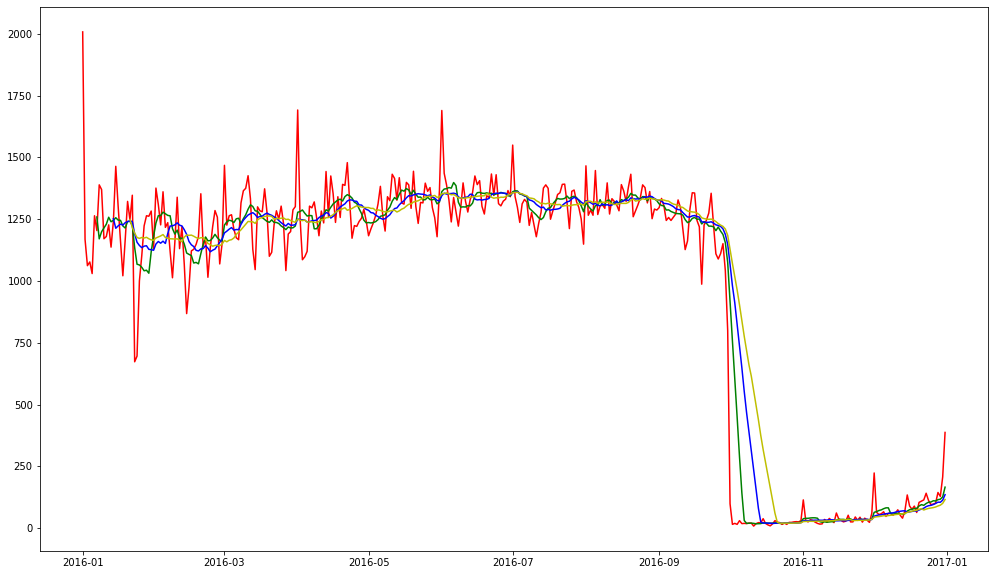

In [35]:
plt.figure(figsize=(17,10))

plt.plot(time_df.index, time_df.crime_cnt, color='r')
plt.plot(time_df.index, time_df.moving_avg7, color='g')
plt.plot(time_df.index, time_df.moving_avg14, color='b')
plt.plot(time_df.index, time_df.moving_avg21, color='y')

plt.show()
